In [55]:
%matplotlib inline

from IPython.display import display
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.formula.api as smf

import math
import warnings

warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd")
pd.options.display.float_format = '{:.3f}'.format


In [56]:
crime = pd.read_csv('/Users/jAir/Desktop/Research/thinkful/datasets/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', header = 4)


In [58]:
crime

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,nan
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,nan
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,nan
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000,nan
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000,nan
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000,nan
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000,nan


In [59]:
list(crime)

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson3',
 'Unnamed: 13']

In [60]:
crime = crime[[
 'Population',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime'
 ]]

In [61]:
crime.columns = [
 'population',
 'murder',
 'rape',
 'robbery',
 'assault',
 'propertycrime']

In [62]:
crime.dtypes

population        object
murder           float64
rape              object
robbery           object
assault           object
propertycrime     object
dtype: object

In [63]:
crime.population = crime.population.str.replace(',','')
crime.rape = crime.rape.str.replace(',','')
crime.robbery = crime.robbery.str.replace(',','')
crime.assault = crime.assault.str.replace(',','')
crime.propertycrime = crime.propertycrime.str.replace(',','')

/Users/jAir/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [64]:
crime.population = pd.to_numeric(crime.population)
crime.rape = pd.to_numeric(crime.rape)
crime.robbery = pd.to_numeric(crime.robbery)
crime.assault = pd.to_numeric(crime.assault)
crime.propertycrime = pd.to_numeric(crime.propertycrime)


/Users/jAir/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [65]:
crime.describe()

,population,murder,rape,robbery,assault,propertycrime
count,348.000,348.000,348.000,348.000,348.000,348.000
mean,40037.632,1.566,5.865,72.902,121.261,792.606
std,450037.368,18.304,60.425,1031.033,1706.132,7659.725
min,526.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,0.000,0.000,0.000,1.000,40.500
50%,7233.500,0.000,0.000,1.000,4.000,112.500
75%,18427.500,0.000,2.000,5.000,14.000,341.000
max,8396126.000,335.000,1112.000,19170.000,31767.000,141971.000


In [66]:
crime.sort_values('population')

,population,murder,rape,robbery,assault,propertycrime
118,526.000,0.000,0.000,0.000,0.000,5.000
319,615.000,0.000,0.000,0.000,0.000,0.000
136,656.000,0.000,0.000,0.000,0.000,10.000
12,658.000,0.000,0.000,0.000,0.000,2.000
44,762.000,0.000,0.000,0.000,0.000,2.000
344,829.000,0.000,0.000,0.000,7.000,17.000
287,872.000,0.000,0.000,0.000,0.000,0.000
266,977.000,0.000,0.000,0.000,0.000,41.000
48,980.000,0.000,0.000,0.000,0.000,4.000
260,997.000,0.000,0.000,0.000,0.000,8.000


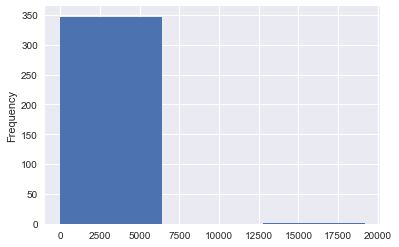

In [67]:
crime.robbery.plot(kind = 'hist', bins = 3)
plt.show()

In [68]:
crime2 = crime.copy()

conditions = [(crime2['robbery'] == 0), crime2['robbery'] > 0]
choices = [0, 1]
crime2['robbery_cat_var'] = np.select(conditions, choices, default = '')

conditions = [(crime2['murder'] == 0), crime2['murder'] > 0]
choices = [0, 1]
crime2['murder_cat_var'] = np.select(conditions, choices, default = '')

In [69]:
crime2

,population,murder,rape,robbery,assault,propertycrime,robbery_cat_var,murder_cat_var
0,1861.000,0.000,0.000,0.000,0.000,12.000,0,0
1,2577.000,0.000,0.000,0.000,3.000,24.000,0,0
2,2846.000,0.000,0.000,0.000,3.000,16.000,0,0
3,97956.000,8.000,30.000,227.000,526.000,4090.000,1,1
4,6388.000,0.000,3.000,4.000,16.000,223.000,1,0
5,4089.000,0.000,0.000,3.000,2.000,46.000,1,0
6,1781.000,0.000,0.000,0.000,3.000,10.000,0,0
7,118296.000,1.000,7.000,31.000,68.000,2118.000,1,1
8,9519.000,0.000,2.000,4.000,3.000,210.000,1,0
9,18182.000,0.000,0.000,12.000,18.000,405.000,1,0


In [70]:
crime = crime.drop([348, 349, 350])
crime = crime.drop([216])

In [71]:
crime

,population,murder,rape,robbery,assault,propertycrime
0,1861.000,0.000,0.000,0.000,0.000,12.000
1,2577.000,0.000,0.000,0.000,3.000,24.000
2,2846.000,0.000,0.000,0.000,3.000,16.000
3,97956.000,8.000,30.000,227.000,526.000,4090.000
4,6388.000,0.000,3.000,4.000,16.000,223.000
5,4089.000,0.000,0.000,3.000,2.000,46.000
6,1781.000,0.000,0.000,0.000,3.000,10.000
7,118296.000,1.000,7.000,31.000,68.000,2118.000
8,9519.000,0.000,2.000,4.000,3.000,210.000
9,18182.000,0.000,0.000,12.000,18.000,405.000


In [72]:
X = crime.drop('propertycrime', axis=1).values
y = crime['propertycrime'].values

In [73]:
X_murder = X[:,1]

y = y.reshape(-1,1)
X_murder = X_murder.reshape(-1,1)

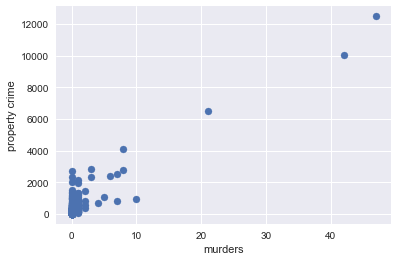

In [74]:
plt.scatter(X_murder, y)
plt.ylabel('property crime')
plt.xlabel('murders')
plt.show()

In [75]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()

regr.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [[ 1.35211120e-02  5.66809439e+01  4.50251375e+01 -9.50319957e-01
   7.53545902e-01]]

Intercept: 
 [9.48025988]

R-squared:
0.9509826192386063


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.871950926182485

In [80]:
from sklearn.model_selection import cross_val_score
regc = linear_model.LinearRegression()
cv_results = cross_val_score(regc, X, y, cv=5)
print(cv_results)

[0.96521924 0.75649653 0.81512196 0.93107447 0.82855845]


For this model, I selected the violent crime data to predict the property crime data. I excluded NYC as it was a major outlier (I thought about trying to standardize all the data in someway - maybe by calculating the standard deviation for all the data, but decided to keep it simple so that I could focus on the model itself). 